### Load Data

In [1]:
import pandas as pd

pd.set_option('display.max_columns', 100)

df_train = pd.read_parquet('../../data/model_data/training_data.parquet').sort_values(by=['Date', 'Ticker'], ignore_index=True)

df_train

,Date,Ticker,Adj Close in 60 Days,Adj Close,Volume,10 Day Avg Gain,10 Day Avg Loss,30 Day Avg Gain,30 Day Avg Loss,60 Day Avg Gain,60 Day Avg Loss,60 Day Price Std,60 Day Price Mean,60 Day Price 10th Percentile,60 Day Price 90th Percentile,Adj Close Mean 0 to 10 Day Lag,Adj Close Mean 10 to 20 Day Lag,Adj Close Mean 20 to 30 Day Lag,Adj Close Mean 30 to 40 Day Lag,Adj Close Mean 40 to 50 Day Lag,Adj Close Mean 0 to 10 Day Lag Difference,Adj Close Mean 10 to 20 Day Lag Difference,Adj Close Mean 20 to 30 Day Lag Difference,Adj Close Mean 30 to 40 Day Lag Difference,Volume Mean 0 to 10 Day Lag,Volume Mean 10 to 20 Day Lag,Volume Mean 20 to 30 Day Lag,Volume Mean 30 to 40 Day Lag,Volume Mean 40 to 50 Day Lag,Congressional Purchases Past 90 Calendar Days,Congressional Sales Past 90 Calendar Days,Unemployment Rate,DSG10,GDP
0,2015-12-24 00:00:00+00:00,AAPL,24.194263,24.494490,54281600.0,0.080037,0.264602,0.128333,0.189401,0.152332,0.156425,0.970395,25.979742,24.720767,27.224792,24.798318,26.579572,26.436727,27.177436,25.869796,-1.781253,0.142845,-0.740709,1.307640,195440160.0,144712000.0,145997280.0,173605320.0,208087560.0,0,1,5.0,2.25,18435.137
1,2015-12-24 00:00:00+00:00,CAT,59.485294,55.321060,2322100.0,0.580481,0.341272,0.365990,0.433235,0.411500,0.335728,2.065715,55.659195,52.515944,57.955542,53.339613,55.278802,56.091318,58.437958,56.003994,-1.939189,-0.812516,-2.346640,2.433964,7296050.0,6032330.0,5290740.0,5432720.0,7550870.0,0,1,5.0,2.25,18435.137
2,2015-12-24 00:00:00+00:00,CVX,65.311241,63.431988,4998700.0,0.797292,0.607789,0.568740,0.546405,0.603434,0.435118,2.167446,61.728233,59.691293,64.050002,62.549253,61.578304,62.236110,63.787218,61.303701,0.970949,-0.657806,-1.551108,2.483516,13462920.0,11568740.0,7670770.0,10350960.0,8460490.0,0,1,5.0,2.25,18435.137
3,2015-12-24 00:00:00+00:00,GS,129.326538,152.492950,1107600.0,1.443274,1.413191,0.928955,1.325819,1.014722,0.916516,4.884594,155.194709,149.171555,160.820096,150.637677,156.244505,159.165193,160.955830,154.478665,-5.606828,-2.920688,-1.790637,6.477165,3325280.0,2986550.0,2618510.0,2585760.0,3099650.0,1,1,5.0,2.25,18435.137
4,2015-12-24 00:00:00+00:00,HD,106.316124,107.910774,1517100.0,0.487182,0.457951,0.705197,0.468655,0.538126,0.316380,4.386560,102.682560,97.203424,108.652122,106.975397,108.263686,103.085273,100.959200,99.922850,-1.288289,5.178413,2.126073,1.036349,4665940.0,5317790.0,6897670.0,4067060.0,4360900.0,1,0,5.0,2.25,18435.137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29140,2024-07-03 00:00:00+00:00,MRK,113.690002,125.013603,4002100.0,0.900972,1.113550,0.571968,0.716370,0.514907,0.514201,2.291954,127.255922,124.141795,129.840558,128.426771,128.371864,126.554128,128.660353,127.112034,0.054907,1.817735,-2.106225,1.548319,14149900.0,6875150.0,8756370.0,6744190.0,7520570.0,0,1,4.3,4.36,29349.924
29141,2024-07-03 00:00:00+00:00,MSFT,428.019989,459.940979,9932800.0,2.303839,0.863437,2.247944,1.069069,2.276352,1.661719,18.010069,423.058963,400.674808,449.087555,451.470270,434.501843,422.797949,415.489096,401.206888,16.968427,11.703894,7.308853,14.282208,18827580.0,16383640.0,20807330.0,16184590.0,22515970.0,3,7,4.3,4.36,29349.924
29142,2024-07-03 00:00:00+00:00,UNH,581.849976,488.159027,2239200.0,3.952988,3.072107,2.638025,3.473563,3.259538,2.664708,18.427638,489.701731,474.279044,512.867938,488.678171,491.051801,499.923950,509.058670,486.139514,-2.373630,-8.872150,-9.134720,22.919156,5933730.0,3452100.0,3867740.0,2913310.0,3079510.0,0,1,4.3,4.36,29349.924
29143,2024-07-03 00:00:00+00:00,WBA,9.060000,10.841380,26845500.0,0.009767,0.499094,0.093112,0.311893,0.100178,0.227093,1.659137,15.978217,14.771623,17.460229,13.444287,15.364481,15.533450,17.143166,17.035427,-1.920194,-0.168969,-1.609716,0.107739,34387240.0,9924720.0,16974690.0,8874300.0,8472370.0,0,1,4.3,4.36,29349.924


In [2]:
df_test = pd.read_parquet('../../data/model_data/testing_data.parquet').sort_values(by=['Date', 'Ticker'], ignore_index=True)

df_test

,Date,Ticker,Adj Close in 60 Days,Adj Close,Volume,10 Day Avg Gain,10 Day Avg Loss,30 Day Avg Gain,30 Day Avg Loss,60 Day Avg Gain,60 Day Avg Loss,60 Day Price Std,60 Day Price Mean,60 Day Price 10th Percentile,60 Day Price 90th Percentile,Adj Close Mean 0 to 10 Day Lag,Adj Close Mean 10 to 20 Day Lag,Adj Close Mean 20 to 30 Day Lag,Adj Close Mean 30 to 40 Day Lag,Adj Close Mean 40 to 50 Day Lag,Adj Close Mean 0 to 10 Day Lag Difference,Adj Close Mean 10 to 20 Day Lag Difference,Adj Close Mean 20 to 30 Day Lag Difference,Adj Close Mean 30 to 40 Day Lag Difference,Volume Mean 0 to 10 Day Lag,Volume Mean 10 to 20 Day Lag,Volume Mean 20 to 30 Day Lag,Volume Mean 30 to 40 Day Lag,Volume Mean 40 to 50 Day Lag,Congressional Purchases Past 90 Calendar Days,Congressional Sales Past 90 Calendar Days,Unemployment Rate,DSG10,GDP
0,2015-12-24 00:00:00+00:00,AMGN,115.816658,126.452103,943000.0,1.096357,0.796363,1.006924,0.814146,1.009135,0.699529,4.877767,120.935859,113.872980,125.740771,124.367628,123.584390,122.481847,123.234310,119.349458,0.783237,1.102544,-0.752464,3.884852,3509140.0,2935060.0,3244410.0,3121370.0,3939210.0,0,1,5.0,2.25,18435.137
1,2015-12-24 00:00:00+00:00,BA,120.255928,128.722504,1185000.0,0.860066,1.118356,0.722253,0.765898,0.755481,0.550366,4.418714,128.754730,122.425815,132.987834,128.988866,131.408534,131.562788,131.684204,127.417228,-2.419669,-0.154253,-0.121416,4.266976,4102880.0,3429540.0,2874360.0,2669230.0,4932430.0,0,0,5.0,2.25,18435.137
2,2015-12-24 00:00:00+00:00,CRM,71.462753,77.486023,1084700.0,0.301661,0.455975,0.410512,0.439715,0.442038,0.360400,1.959126,77.697573,74.935341,80.333372,77.316764,80.091447,78.447742,78.189886,77.475058,-2.774683,1.643704,0.257856,0.714828,3380550.0,3321140.0,4858610.0,2680950.0,3133940.0,0,0,5.0,2.25,18435.137
3,2015-12-24 00:00:00+00:00,MMM,101.896019,93.109833,1014686.0,0.547489,0.937321,0.418124,0.558164,0.471638,0.355560,3.042756,94.410902,90.543301,97.323853,92.691669,96.557341,96.801584,96.959827,93.484661,-3.865672,-0.244243,-0.158244,3.475166,4314270.8,2702302.2,2377576.3,2735491.2,3282111.0,0,4,5.0,2.25,18435.137
4,2015-12-24 00:00:00+00:00,PG,65.515038,62.572762,2498000.0,0.392109,0.235263,0.312118,0.211999,0.276281,0.165433,1.708618,59.624889,57.670639,61.964988,62.221431,60.184812,59.228064,59.851521,59.040537,2.036619,0.956747,-0.623456,0.810983,11361240.0,8779930.0,7697420.0,7611840.0,10391110.0,5,0,5.0,2.25,18435.137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17147,2024-07-03 00:00:00+00:00,MMM,137.300003,101.075127,1230800.0,0.492346,0.407801,0.398187,0.493153,0.534609,0.363463,4.311441,97.311003,90.673070,101.844837,101.428220,99.968090,99.001164,99.215373,93.435883,1.460130,0.966926,-0.214209,5.779490,3857360.0,3596170.0,5981670.0,4513980.0,6318350.0,0,1,4.3,4.36,29349.924
17148,2024-07-03 00:00:00+00:00,PG,173.550003,162.850555,2980500.0,0.254468,0.724640,0.502974,0.618281,0.546859,0.401216,4.032108,162.986984,155.269542,166.811732,165.074182,166.086095,164.065250,165.471790,161.920151,-1.011913,2.020845,-1.406540,3.551639,7454720.0,5010550.0,5626180.0,5269990.0,6465080.0,1,2,4.3,4.36,29349.924
17149,2024-07-03 00:00:00+00:00,TRV,236.110001,202.802933,523100.0,0.665091,1.144991,0.749383,1.109372,0.799882,1.227396,4.858594,211.269899,204.942570,217.742920,205.892415,207.809865,210.726520,215.512764,211.772733,-1.917450,-2.916655,-4.786244,3.740031,1482260.0,1208760.0,1186330.0,952710.0,1215390.0,0,0,4.3,4.36,29349.924
17150,2024-07-03 00:00:00+00:00,V,275.170013,268.451660,5017800.0,1.084824,1.546899,0.893207,1.210904,0.873464,1.010804,4.046228,272.651303,267.565256,277.995547,269.957657,273.140280,272.119324,278.085852,270.490982,-3.182623,1.020956,-5.966528,7.594870,12733170.0,6560590.0,5575850.0,10566510.0,5965770.0,1,2,4.3,4.36,29349.924


In [3]:
df_val = pd.read_parquet('../../data/model_data/validation_data.parquet').sort_values(by=['Date', 'Ticker'], ignore_index=True)

df_val

,Date,Ticker,Adj Close in 60 Days,Adj Close,Volume,10 Day Avg Gain,10 Day Avg Loss,30 Day Avg Gain,30 Day Avg Loss,60 Day Avg Gain,60 Day Avg Loss,60 Day Price Std,60 Day Price Mean,60 Day Price 10th Percentile,60 Day Price 90th Percentile,Adj Close Mean 0 to 10 Day Lag,Adj Close Mean 10 to 20 Day Lag,Adj Close Mean 20 to 30 Day Lag,Adj Close Mean 30 to 40 Day Lag,Adj Close Mean 40 to 50 Day Lag,Adj Close Mean 0 to 10 Day Lag Difference,Adj Close Mean 10 to 20 Day Lag Difference,Adj Close Mean 20 to 30 Day Lag Difference,Adj Close Mean 30 to 40 Day Lag Difference,Volume Mean 0 to 10 Day Lag,Volume Mean 10 to 20 Day Lag,Volume Mean 20 to 30 Day Lag,Volume Mean 30 to 40 Day Lag,Volume Mean 40 to 50 Day Lag,Congressional Purchases Past 90 Calendar Days,Congressional Sales Past 90 Calendar Days,Unemployment Rate,DSG10,GDP
0,2015-12-24 00:00:00+00:00,AXP,53.312790,61.423836,1956400.0,0.365078,0.360697,0.232587,0.312839,0.245531,0.295891,2.345914,63.849332,61.135779,67.412856,60.703300,62.062912,62.931396,64.562424,66.024479,-1.359612,-0.868484,-1.631028,-1.462054,6577980.0,5235460.0,4932520.0,6215000.0,7275040.0,0,1,5.0,2.25,18435.137
1,2015-12-24 00:00:00+00:00,CSCO,21.135672,20.633146,8166300.0,0.166542,0.120574,0.114544,0.125597,0.112661,0.091937,0.663431,20.801952,20.064189,21.748457,20.199084,20.508805,20.470374,21.454555,21.639188,-0.309721,0.038431,-0.984182,-0.184632,24778710.0,23627670.0,36908410.0,26037480.0,22088420.0,0,0,5.0,2.25,18435.137
2,2015-12-24 00:00:00+00:00,DIS,90.638680,99.091301,4356100.0,0.580356,1.039025,0.510305,0.819761,0.566270,0.506301,4.315714,104.091629,98.092763,109.261369,101.826469,105.414491,109.385078,107.113773,103.566383,-3.588022,-3.970586,2.271304,3.547391,13367630.0,9767410.0,7206910.0,10503590.0,7509160.0,0,0,5.0,2.25,18435.137
3,2015-12-24 00:00:00+00:00,HON,89.748055,83.227882,832731.0,0.754738,0.524899,0.475564,0.422897,0.463923,0.324914,2.097698,80.788164,77.708540,82.883507,81.141813,82.130360,82.126520,81.710297,79.408560,-0.988548,0.003841,0.416223,2.301736,4516328.5,2761647.1,3331478.4,2719260.4,5065076.9,0,0,5.0,2.25,18435.137
4,2015-12-24 00:00:00+00:00,IBM,94.954712,89.372406,1563979.0,0.540437,0.445409,0.435495,0.365894,0.418437,0.461595,3.139906,90.550352,87.276630,96.078659,88.528802,89.805550,87.817047,89.249786,92.376886,-1.276748,1.988503,-1.432738,-3.127100,5200565.6,4224271.1,4412456.8,4705525.0,7938480.9,1,1,5.0,2.25,18435.137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17147,2024-07-03 00:00:00+00:00,HON,207.630005,211.303818,1086700.0,0.621600,0.662376,0.845707,0.585796,0.859209,0.598278,7.978585,201.162974,191.553133,212.279465,212.592758,208.578725,200.346765,200.930688,192.291165,4.014034,8.231960,-0.583923,8.639523,3191020.0,2572380.0,2527860.0,2425270.0,3180500.0,1,0,4.3,4.36,29349.924
17148,2024-07-03 00:00:00+00:00,IBM,220.839996,174.206345,1649000.0,1.226273,0.712766,0.800664,0.608677,0.646026,0.847996,5.953506,170.180709,164.179771,178.995076,172.272269,167.799390,167.435568,166.491324,166.810649,4.472879,0.363821,0.944244,-0.319325,4160870.0,3158030.0,3664780.0,3185900.0,6598910.0,0,1,4.3,4.36,29349.924
17149,2024-07-03 00:00:00+00:00,KO,71.790001,62.898792,9154200.0,0.216516,0.146992,0.175193,0.134083,0.195842,0.121082,1.688137,61.385548,58.183553,63.035769,62.981226,62.507845,61.625074,62.122773,60.898728,0.473381,0.882772,-0.497699,1.224045,12866900.0,10049930.0,10997740.0,10137340.0,14469920.0,0,0,4.3,4.36,29349.924
17150,2024-07-03 00:00:00+00:00,MCD,303.690002,248.553665,2026100.0,1.251721,1.330263,0.965298,1.500254,0.917774,1.180148,7.925374,261.112749,250.336351,270.584464,253.481990,253.631113,255.584926,267.550943,270.286166,-0.149123,-1.953813,-11.966017,-2.735223,4482100.0,2999610.0,4030070.0,3195520.0,3825750.0,0,0,4.3,4.36,29349.924


Remove features that do not seem impactful

In [4]:
df_train.drop(
    columns=[
        'Volume', '10 Day Avg Gain', '30 Day Avg Gain', '60 Day Price Std',
        '60 Day Price Mean', 
        'Volume Mean 0 to 10 Day Lag', 'Volume Mean 20 to 30 Day Lag',
        'Volume Mean 30 to 40 Day Lag', 'Volume Mean 40 to 50 Day Lag',
        'Congressional Purchases Past 90 Calendar Days', 'Volume Mean 10 to 20 Day Lag',
    ],
    inplace=True,
)

df_test.drop(
    columns=[
        'Volume', '10 Day Avg Gain', '30 Day Avg Gain', '60 Day Price Std',
        '60 Day Price Mean', 
        'Volume Mean 0 to 10 Day Lag', 'Volume Mean 20 to 30 Day Lag',
        'Volume Mean 30 to 40 Day Lag', 'Volume Mean 40 to 50 Day Lag',
        'Congressional Purchases Past 90 Calendar Days', 'Volume Mean 10 to 20 Day Lag',
    ],
    inplace=True,
)

df_val.drop(
    columns=[
        'Volume', '10 Day Avg Gain', '30 Day Avg Gain', '60 Day Price Std',
        '60 Day Price Mean', 
        'Volume Mean 0 to 10 Day Lag', 'Volume Mean 20 to 30 Day Lag',
        'Volume Mean 30 to 40 Day Lag', 'Volume Mean 40 to 50 Day Lag',
        'Congressional Purchases Past 90 Calendar Days', 'Volume Mean 10 to 20 Day Lag',
    ],
    inplace=True,
)

df_train.shape, df_val.shape, df_test.shape

((29145, 23), (17152, 23), (17152, 23))

### Feature Setup

In [5]:
X_train = df_train.drop(columns=['Date', 'Ticker', 'Adj Close in 60 Days'])
y_train = df_train['Adj Close in 60 Days'] - df_train['Adj Close']

X_val = df_val.drop(columns=['Date', 'Ticker', 'Adj Close in 60 Days'])
y_val = df_val['Adj Close in 60 Days'] - df_val['Adj Close']

X_test = df_test.drop(columns=['Date', 'Ticker', 'Adj Close in 60 Days'])
y_test = df_test['Adj Close in 60 Days'] - df_test['Adj Close']

X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((29145, 20), (17152, 20), (17152, 20), (29145,), (17152,), (17152,))

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.set_output(transform='pandas')

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

X_train.shape, X_val.shape, X_test.shape

((29145, 20), (17152, 20), (17152, 20))

In [7]:
import numpy as np

X_train_tabular = X_train[['Adj Close', '10 Day Avg Loss', '30 Day Avg Loss', '60 Day Avg Gain', '60 Day Avg Loss', '60 Day Price 10th Percentile', '60 Day Price 90th Percentile', 'Congressional Sales Past 90 Calendar Days', 'Unemployment Rate', 'DSG10', 'GDP']].to_numpy()
X_train_close = np.expand_dims(X_train.loc[:, (X_train.columns.str.contains('Adj Close Mean')) & ~(X_train.columns.str.contains('Difference'))].to_numpy(), -1)
X_train_close_difference = np.expand_dims(X_train.loc[:, (X_train.columns.str.contains('Adj Close Mean')) & (X_train.columns.str.contains('Difference'))].to_numpy(), -1)

X_train_tabular.shape, X_train_close.shape, X_train_close_difference.shape

((29145, 11), (29145, 5, 1), (29145, 4, 1))

In [8]:
X_val_tabular = X_val[['Adj Close', '10 Day Avg Loss', '30 Day Avg Loss', '60 Day Avg Gain', '60 Day Avg Loss', '60 Day Price 10th Percentile', '60 Day Price 90th Percentile', 'Congressional Sales Past 90 Calendar Days', 'Unemployment Rate', 'DSG10', 'GDP']].to_numpy()
X_val_close = np.expand_dims(X_val.loc[:, (X_val.columns.str.contains('Adj Close Mean')) & ~(X_val.columns.str.contains('Difference'))].to_numpy(), -1)
X_val_close_difference = np.expand_dims(X_val.loc[:, (X_val.columns.str.contains('Adj Close Mean')) & (X_val.columns.str.contains('Difference'))].to_numpy(), -1)

X_val_tabular.shape, X_val_close.shape, X_val_close_difference.shape

((17152, 11), (17152, 5, 1), (17152, 4, 1))

In [9]:
X_test_tabular = X_test[['Adj Close', '10 Day Avg Loss', '30 Day Avg Loss', '60 Day Avg Gain', '60 Day Avg Loss', '60 Day Price 10th Percentile', '60 Day Price 90th Percentile', 'Congressional Sales Past 90 Calendar Days', 'Unemployment Rate', 'DSG10', 'GDP']].to_numpy()
X_test_close = np.expand_dims(X_test.loc[:, (X_test.columns.str.contains('Adj Close Mean')) & ~(X_test.columns.str.contains('Difference'))].to_numpy(), -1)
X_test_close_difference = np.expand_dims(X_test.loc[:, (X_test.columns.str.contains('Adj Close Mean')) & (X_test.columns.str.contains('Difference'))].to_numpy(), -1)

X_test_tabular.shape, X_test_close.shape, X_test_close_difference.shape

((17152, 11), (17152, 5, 1), (17152, 4, 1))

### Hyperparameter Tuning

In [10]:
from tensorflow.keras.layers import Input, Dense, LSTM, Concatenate, Flatten
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import GlorotNormal
from tensorflow.config.experimental import enable_op_determinism
from tensorflow.random import set_seed
import numpy as np
import os

os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"

def build_and_compile_model(
    tabular_input_shape: tuple,
    close_input_shape: tuple,
    close_difference_input_shape: tuple,
    lstm_neurons: int,
    hidden_layer_neurons: list,
    l1s: list,
    l2s: list,
    learning_rate: float
):
    enable_op_determinism()
    set_seed(22)

    tabular = Input(shape=tabular_input_shape, name='tabular')
    flatten_tabular = Flatten(name='flatten_tabular')(tabular)

    close = Input(shape=close_input_shape, name='close')
    close_lstm = LSTM(lstm_neurons, activation='relu', kernel_initializer=GlorotNormal(seed=22), name=f"close_lstm")(close)
    flatten_close = Flatten(name='flatten_close')(close_lstm)

    close_difference = Input(shape=close_difference_input_shape, name='close_difference')
    close_difference_lstm = LSTM(lstm_neurons, activation='relu', kernel_initializer=GlorotNormal(seed=22), name=f"close_difference_lstm")(close_difference)
    flatten_close_difference = Flatten(name='flatten_close_difference')(close_difference_lstm)

    concat = Concatenate(name='concatenate')([flatten_tabular, flatten_close, flatten_close_difference])

    h = concat
    for i, neurons in enumerate(hidden_layer_neurons):
        h = Dense(
            neurons,
            activation='relu',
            kernel_initializer=GlorotNormal(seed=22),
            kernel_regularizer=L1L2(l1=l1s[i], l2=l2s[i]),
            name=f"hidden_{i+1}"
        )(h)

    outputs = Dense(1, activation=None, kernel_initializer=GlorotNormal(seed=22), name='outputs')(h)

    mod = Model(inputs=[tabular, close, close_difference], outputs=outputs)

    mod.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_absolute_error', metrics=['mean_squared_error'])

    return mod

mod = build_and_compile_model(
    tabular_input_shape=X_train_tabular.shape[1:],
    close_input_shape=X_train_close.shape[1:],
    close_difference_input_shape=X_train_close_difference.shape[1:],
    lstm_neurons=8,
    hidden_layer_neurons=[128, 16],
    l1s=[0.0, 0.0],
    l2s=[0.0, 0.0],
    learning_rate=0.15,
)

mod.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 close (InputLayer)             [(None, 5, 1)]       0           []                               
                                                                                                  
 close_difference (InputLayer)  [(None, 4, 1)]       0           []                               
                                                                                                  
 tabular (InputLayer)           [(None, 11)]         0           []                               
                                                                                                  
 close_lstm (LSTM)              (None, 8)            320         ['close[0][0]']                  
                                                                                              

In [11]:
mod.fit(
    [X_train_tabular, X_train_close, X_train_close_difference],
    y_train,
    validation_data=([X_val_tabular, X_val_close, X_val_close_difference], y_val),
    batch_size=2048,
    epochs=500,
    callbacks=[EarlyStopping(patience=25, restore_best_weights=True)],
    verbose=1,
)

Epoch 1/500
15/15 [==============================] - 5s 108ms/step - loss: 11.9195 - mean_squared_error: 351.1502 - val_loss: 9.3976 - val_mean_squared_error: 186.9662
Epoch 2/500
15/15 [==============================] - 1s 37ms/step - loss: 11.4773 - mean_squared_error: 332.6514 - val_loss: 9.0116 - val_mean_squared_error: 172.8820
Epoch 3/500
15/15 [==============================] - 1s 71ms/step - loss: 11.4089 - mean_squared_error: 328.9667 - val_loss: 8.9838 - val_mean_squared_error: 171.9802
Epoch 4/500
15/15 [==============================] - 1s 70ms/step - loss: 11.3856 - mean_squared_error: 327.5571 - val_loss: 8.9499 - val_mean_squared_error: 170.2621
Epoch 5/500
15/15 [==============================] - 1s 71ms/step - loss: 11.3348 - mean_squared_error: 324.2905 - val_loss: 8.9982 - val_mean_squared_error: 172.8059
Epoch 6/500
15/15 [==============================] - 1s 91ms/step - loss: 11.2604 - mean_squared_error: 320.2359 - val_loss: 9.0665 - val_mean_squared_error: 174.72

### Evaluation

In [12]:
from sklearn.metrics import root_mean_squared_error

df_test['Prediction'] = mod.predict([X_test_tabular, X_test_close, X_test_close_difference]).reshape(-1) + df_test['Adj Close']

root_mean_squared_error(df_test['Adj Close in 60 Days'], df_test['Prediction'])

536/536 [==============================] - 2s 3ms/step


22.09827516623039

In [13]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(df_test['Adj Close in 60 Days'], df_test['Prediction'])

13.402672612031838

In [14]:
# directional accuracy
((df_test['Adj Close in 60 Days'] >= df_test['Adj Close']) == (df_test['Prediction'] >= df_test['Adj Close'])).mean()

0.5923507462686567

In [15]:
(df_test['Adj Close in 60 Days'] - df_test['Prediction']).describe()

count    17152.000000
mean        -0.240504
std         22.097611
min       -241.745835
25%         -7.158438
50%          0.683007
75%          8.631841
max        106.584527
dtype: float64

In [16]:
(df_test['Adj Close in 60 Days'] - df_test['Prediction']).abs().describe()

count    17152.000000
mean        13.402673
std         17.570433
min          0.001289
25%          3.046275
50%          8.034876
75%         17.160242
max        241.745835
dtype: float64

What is the distribution of predictions from the model?

In [17]:
(df_test['Prediction'] - df_test['Adj Close']).describe(percentiles=[0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95])

count    17152.000000
mean         3.503473
std         10.079640
min        -31.567856
5%          -9.390405
10%         -4.452733
25%         -1.356194
50%          1.202278
75%          7.161192
90%         14.756340
95%         20.645470
max        170.024292
dtype: float64

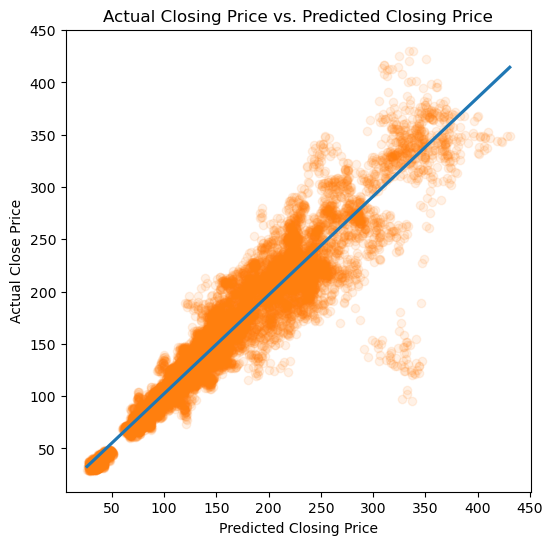

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6), dpi=100)

ax = sns.regplot(
    data=df_test,
    x='Prediction',
    y='Adj Close in 60 Days',
    scatter_kws={'alpha': 0.10, 'color': sns.color_palette()[1]},
    line_kws={'color': sns.color_palette()[0]},
)

plt.title('Actual Closing Price vs. Predicted Closing Price')
plt.xlabel('Predicted Closing Price')
plt.ylabel('Actual Close Price')

plt.show()

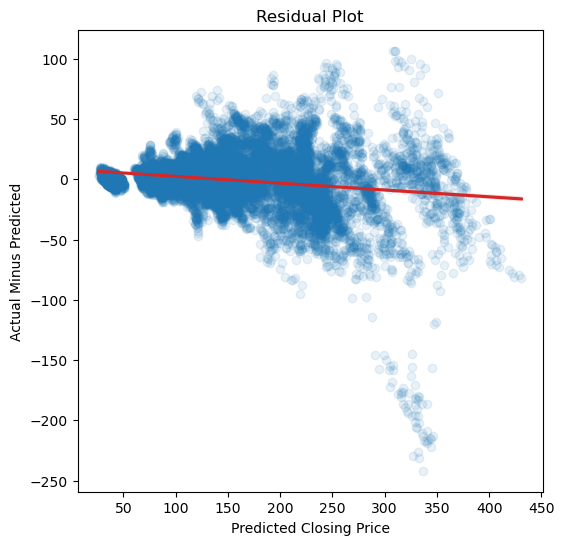

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6), dpi=100)

ax = sns.regplot(
    data=df_test.assign(f=(df_test['Adj Close in 60 Days'] - df_test['Prediction'])),
    x='Prediction',
    y='f',
    scatter_kws={'alpha': 0.10, 'color': sns.color_palette()[0]},
    line_kws={'color': sns.color_palette()[3]},
)

plt.title('Residual Plot')
plt.xlabel('Predicted Closing Price')
plt.ylabel('Actual Minus Predicted')

plt.show()

In [20]:
(df_test['Prediction'] > df_test['Adj Close']).mean()

0.6076259328358209

In [21]:
(df_test['Adj Close in 60 Days'] > df_test['Adj Close']).mean()

0.6192280783582089

In [22]:
df_test.loc[df_test['Prediction'] > df_test['Adj Close'], ['Adj Close', 'Adj Close in 60 Days']].diff(axis=1)['Adj Close in 60 Days'].sum()

51202.63465499878

In [23]:
df_test.loc[df_test['Prediction'] < df_test['Adj Close'], ['Adj Close', 'Adj Close in 60 Days']].diff(axis=1)['Adj Close in 60 Days'].sum()

4763.798345565796

In [24]:
(df_test['Adj Close in 60 Days'] - df_test['Adj Close']).describe()

count    17152.000000
mean         3.262968
std         22.064209
min       -240.543556
25%         -4.017086
50%          3.005753
75%         11.673393
max        110.637756
dtype: float64

In [25]:
(df_test['Prediction'] - df_test['Adj Close']).describe()

count    17152.000000
mean         3.503473
std         10.079640
min        -31.567856
25%         -1.356194
50%          1.202278
75%          7.161192
max        170.024292
dtype: float64